In [31]:
import pandas as pd
import arff
data_freq = arff.load('freMTPL2freq.arff')
df_freq = pd.DataFrame(data_freq, columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower",
"VehAge", "DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"])
data_sev = arff.load('freMTPL2sev.arff')
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"])

### Initial Exploration of the dataset

In [32]:
df_freq.head(10)

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
1,3.0,1.0,0.77,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
2,5.0,1.0,0.75,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22'
3,10.0,1.0,0.09,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
4,11.0,1.0,0.84,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
5,13.0,1.0,0.52,'E',6.0,2.0,38.0,50.0,'B12',Regular,3003.0,'R31'
6,15.0,1.0,0.45,'E',6.0,2.0,38.0,50.0,'B12',Regular,3003.0,'R31'
7,17.0,1.0,0.27,'C',7.0,0.0,33.0,68.0,'B12',Diesel,137.0,'R91'
8,18.0,1.0,0.71,'C',7.0,0.0,33.0,68.0,'B12',Diesel,137.0,'R91'
9,21.0,1.0,0.15,'B',7.0,0.0,41.0,50.0,'B12',Diesel,60.0,'R52'


In [33]:
df_sev.head(10)

,IDpol,ClaimAmount
0,1552.0,995.20
1,1010996.0,1128.12
2,4024277.0,1851.11
3,4007252.0,1204.00
4,4046424.0,1204.00
5,4073956.0,1204.00
6,4012173.0,1204.00
7,4020812.0,54942.62
8,4020812.0,7620.00
9,4074074.0,1204.00


### Grouping and joining the dataframes

In [34]:
# Summing up the ClaimAmount over identical IDs to consolidate claims per policy
df_sev = df_sev.groupby("IDpol").sum()
# Joining the dataframes on 'IDpol' with a right join to ensure all df_sev records are included
df_merged = pd.merge(df_freq,df_sev,how ='right', on = 'IDpol')
df_merged.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,139.0,1.0,0.75,'F',7.0,1.0,61.0,50.0,'B12',Regular,27000.0,'R11',303.00
1,190.0,1.0,0.14,'B',12.0,5.0,50.0,60.0,'B12',Diesel,56.0,'R25',1981.84
2,414.0,1.0,0.14,'E',4.0,0.0,36.0,85.0,'B12',Regular,4792.0,'R11',1456.55
3,424.0,2.0,0.62,'F',10.0,0.0,51.0,100.0,'B12',Regular,27000.0,'R11',10834.00
4,463.0,1.0,0.31,'A',5.0,0.0,45.0,50.0,'B12',Regular,12.0,'R73',3986.67


### Looking for outliers in the dataset so as to avoid model overfitting in the future. Looking over the min- max range to see any big daviations

In [35]:
# Using descriptive statistics to understand the distribution of data and identify outliers
df_merged.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount
count,2.495000e+04,24944.000000,24944.000000,24944.000000,24944.000000,24944.000000,24944.000000,24944.000000,2.495000e+04
mean,2.262558e+06,1.060175,0.692669,6.468970,7.386225,45.139793,64.930164,1984.306166,2.432783e+03
std,1.578285e+06,0.289929,0.313969,2.012848,5.173621,14.658487,19.864719,4119.719566,3.036192e+04
min,1.390000e+02,1.000000,0.002740,4.000000,0.000000,18.000000,50.000000,2.000000,1.000000e+00
25%,1.082755e+06,1.000000,0.450000,5.000000,3.000000,34.000000,50.000000,111.000000,7.498400e+02
50%,2.130128e+06,1.000000,0.760000,6.000000,7.000000,45.000000,55.000000,495.000000,1.172000e+03
75%,3.178382e+06,1.000000,1.000000,7.000000,11.000000,54.000000,76.000000,2120.000000,1.346400e+03
max,6.113971e+06,16.000000,2.000000,15.000000,99.000000,99.000000,228.000000,27000.000000,4.075401e+06


In [36]:
# Focusing on 'ClaimNb' values to identify less frequent claims and treat them as outliers for a more stable model 
df_merged.ClaimNb.value_counts() 

ClaimNb
1.0     23570
2.0      1299
3.0        62
4.0         5
5.0         2
11.0        2
6.0         1
8.0         1
16.0        1
9.0         1
Name: count, dtype: int64

In [37]:
# Applying a threshold to filter out less frequent claim numbers and keeping the top 3 and remaining are treated as outliers(13 datapoints)
df_merged = df_merged[df_merged.groupby(by = 'ClaimNb')['ClaimNb'].transform('size')>=60]  

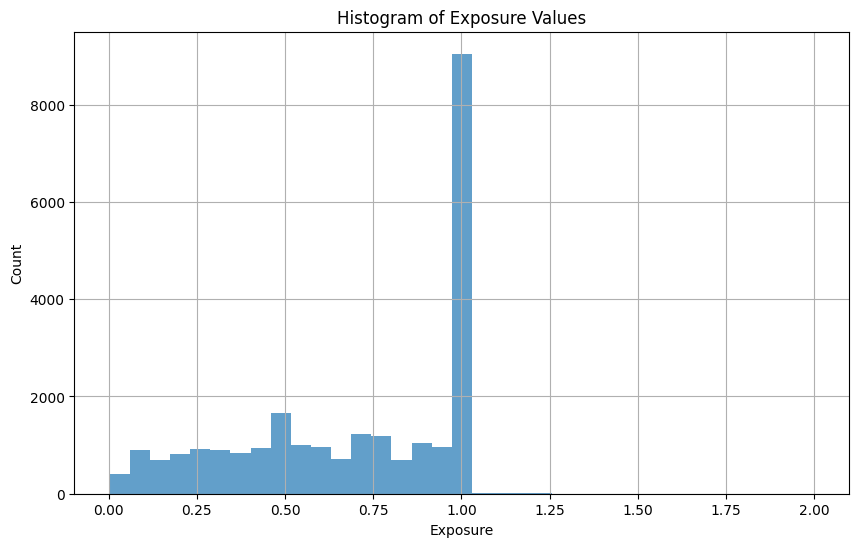

In [38]:
import matplotlib.pyplot as plt

# Visualizing the distribution of 'Exposure' to further identify outliers

plt.figure(figsize=(10, 6))
plt.hist(df_merged['Exposure'], bins=35, alpha=0.7)
plt.title('Histogram of Exposure Values')
plt.xlabel('Exposure')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [39]:
import numpy as np
# Examining the exposure feature to remove outliers based on percentile distributions
# looking for outliers in top 91 to 100 percentiles
print(np.percentile(df_merged['Exposure'].tolist(),np.linspace(91,100,10)))
print('*'*70)
# looking for outliers in bottom 0 to 10 percentiles
print(np.percentile(df_merged['Exposure'].tolist(),np.linspace(0,10,10)))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
**********************************************************************
[0.00273973 0.04       0.07       0.08       0.1        0.12
 0.15       0.17       0.19       0.21      ]


In [40]:
# Applying a threshold to keep Exposure values in the range of 0.1 and 1 (above 1 there are very few datapoints 
# so we are treating them as outliers whereas below 0.1 we consider exposure of the policy holder to be very low,around a month, so we are not considering those datapoints
df_merged = df_merged[(df_merged.Exposure <= 1) & (df_merged.Exposure >= 0.1)]  # removing outlier Exposure 

In [41]:
import numpy as np
# Examining the Claim Amount feature to remove outliers based on percentile distributions
# looking for outliers in Claim Amount top 91 to 100 percentiles
print(np.percentile(df_merged['ClaimAmount'].tolist(),np.linspace(91,100,10)))
print('*'*70)
# looking for outliers in Claim Amount top 91 to 100 percentiles
print(np.percentile(df_merged['ClaimAmount'].tolist(),np.linspace(99,100,10)))
print('*'*70)
# looking for outliers in Claim Amount in the bottom 0 to 10 percentiles
print(np.percentile(df_merged['ClaimAmount'].tolist(),np.linspace(0,10,20)))
print('*'*70)

[3.12522500e+03 3.36082000e+03 3.73721400e+03 4.19384600e+03
 4.85149000e+03 5.67758400e+03 7.22032500e+03 9.92781700e+03
 1.67877730e+04 4.07540056e+06]
**********************************************************************
[  16787.773        18888.06377778   21876.84227778   25492.64666667
   30656.59722222   37568.80177778   49225.91666667   68409.96666667
  131034.19433333 4075400.56      ]
**********************************************************************
[  1.          23.66131579  40.50631579  58.69        65.74157895
  70.36052632  73.11631579  75.46        76.5         78.16
  80.58526316  83.87394737  89.7         98.06394737 113.63684211
 131.71921053 150.59947368 167.30052632 188.87210526 206.88      ]
**********************************************************************


In [42]:
# Applying a threshold to keep Claim Amount in the range of 5 and 160000 (less than 5 dollars is too low and above 160000 is too high
# so we are treating the datapoints as outliers
df_merged = df_merged[(df_merged['ClaimAmount'] <= 160000) & (df_merged['ClaimAmount'] >= 5)]

In [43]:
# Check missing values(NaNs) in each column
missing_values= [x for x in df_merged.columns if df_merged[x].isna().sum() > 0]
print('there is missing data in following columns {}'.format(missing_values))

there is missing data in following columns []


In [44]:
# Creating a new feature 'Insurance_premium' by dividing 'ClaimAmount' by 'Exposure'
df_merged['Insurance_premium'] = df_merged['ClaimAmount']/ df_merged['Exposure']
df_merged.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,Insurance_premium
0,139.0,1.0,0.75,'F',7.0,1.0,61.0,50.0,'B12',Regular,27000.0,'R11',303.00,404.000000
1,190.0,1.0,0.14,'B',12.0,5.0,50.0,60.0,'B12',Diesel,56.0,'R25',1981.84,14156.000000
2,414.0,1.0,0.14,'E',4.0,0.0,36.0,85.0,'B12',Regular,4792.0,'R11',1456.55,10403.928571
3,424.0,2.0,0.62,'F',10.0,0.0,51.0,100.0,'B12',Regular,27000.0,'R11',10834.00,17474.193548
4,463.0,1.0,0.31,'A',5.0,0.0,45.0,50.0,'B12',Regular,12.0,'R73',3986.67,12860.225806


In [45]:
import numpy as np
### looking for outliers in top 91 to 100 percentiles
print(np.percentile(df_merged['Insurance_premium'].tolist(),np.linspace(91,100,10)))
print('*'*70)
### looking for outliers in bottom 0 to 10 percentiles
print(np.percentile(df_merged['Insurance_premium'].tolist(),np.linspace(0,10,10)))
print('*'*70)

[  7142.731875     7878.9384127    8680.03805128   9927.91459459
  11281.2         13158.21314286  16686.81        23112.66858238
  41393.18766667 921490.        ]
**********************************************************************
[  5.07        59.12266667  75.32        81.75884588  98.78139951
 128.04103634 162.17002837 201.00988889 247.67444444 296.32083739]
**********************************************************************


In [46]:
df_merged = df_merged[(df_merged['Insurance_premium'] <= 100000) & (df_merged['Insurance_premium'] >= 10)]

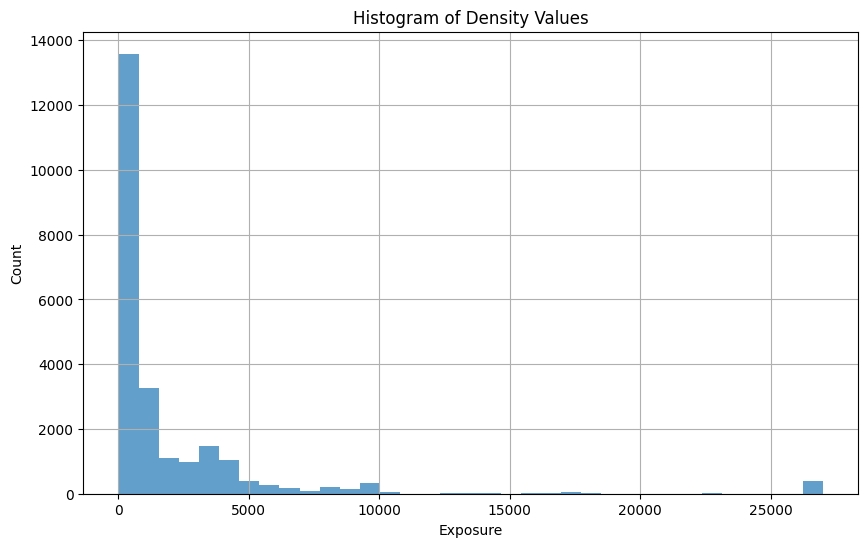

In [47]:
import matplotlib.pyplot as plt

# Visualizing the distribution of 'Density' (looks like Power law distribution)

plt.figure(figsize=(10, 6))
plt.hist(df_merged['Density'], bins=35, alpha=0.7)
plt.title('Histogram of Density Values')
plt.xlabel('Exposure')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [48]:
# taking natural logarithm of the Density feature for Variance stablization
df_merged['Density'] = np.log(df_merged['Density'])
df_merged.describe()


,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount,Insurance_premium
count,2.364600e+04,23646.000000,23646.000000,23646.000000,23646.000000,23646.000000,23646.000000,23646.000000,23646.000000,23646.000000
mean,2.258140e+06,1.057642,0.722271,6.474922,7.359342,45.336632,64.792354,6.163214,1655.011544,3195.635759
std,1.584500e+06,0.243541,0.288016,2.014734,5.156160,14.667229,19.878634,1.850159,3155.437334,6454.808357
min,1.390000e+02,1.000000,0.100000,4.000000,0.000000,18.000000,50.000000,0.693147,5.890000,10.000000
25%,1.079724e+06,1.000000,0.490000,5.000000,3.000000,34.000000,50.000000,4.700480,750.430000,1128.000000
50%,2.124287e+06,1.000000,0.800000,6.000000,7.000000,45.000000,55.000000,6.190315,1172.000000,1418.200000
75%,3.176976e+06,1.000000,1.000000,7.000000,11.000000,54.000000,76.000000,7.651120,1319.827500,2936.585366
max,6.113971e+06,3.000000,1.000000,15.000000,99.000000,99.000000,228.000000,10.203592,96422.320000,99806.923077


In [49]:
# One-hot encoding of categorical variables to prepare data for model input
df_merged = pd.get_dummies(df_merged, columns=['Area','VehBrand','VehGas','Region'], dtype = int)
df_merged.head()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount,Insurance_premium,...,Region_'R53',Region_'R54',Region_'R72',Region_'R73',Region_'R74',Region_'R82',Region_'R83',Region_'R91',Region_'R93',Region_'R94'
0,139.0,1.0,0.75,7.0,1.0,61.0,50.0,10.203592,303.00,404.000000,...,0,0,0,0,0,0,0,0,0,0
1,190.0,1.0,0.14,12.0,5.0,50.0,60.0,4.025352,1981.84,14156.000000,...,0,0,0,0,0,0,0,0,0,0
2,414.0,1.0,0.14,4.0,0.0,36.0,85.0,8.474703,1456.55,10403.928571,...,0,0,0,0,0,0,0,0,0,0
3,424.0,2.0,0.62,10.0,0.0,51.0,100.0,10.203592,10834.00,17474.193548,...,0,0,0,0,0,0,0,0,0,0
4,463.0,1.0,0.31,5.0,0.0,45.0,50.0,2.484907,3986.67,12860.225806,...,0,0,0,1,0,0,0,0,0,0


In [50]:
# Dropping columns not required for model building
df_merged.drop(columns = ['ClaimAmount','Exposure','IDpol'], inplace = True)

In [51]:
from feature_engine.selection import DropCorrelatedFeatures

# Removing correlated features to reduce redundancy and potential multicollinearity
correlated = DropCorrelatedFeatures(method='spearman', threshold=0.99)
correlated.fit(df_merged.drop(columns = 'Insurance_premium'))
print('the number of correlated features which are going to be dropped are {}'.format(len(correlated.features_to_drop_)))
print('the group of correlated features is {}'.format(correlated.correlated_feature_sets_))
df_merged.drop(columns = 'VehGas_Diesel',inplace = True)

the number of correlated features which are going to be dropped are 1
the group of correlated features is [{'VehGas_Regular', 'VehGas_Diesel'}]


### Train test split

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Splitting the data into training and test sets and applying MinMax normalization
x = df_merged.drop(columns = 'Insurance_premium')
y = df_merged['Insurance_premium']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=25)
columns = X_train.columns
# Normalization
scaler = MinMaxScaler() # in case 0,1 normalization
# transform data
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
X_train.columns = X_test.columns = columns

### Linear Model trained with L1 regularizer ie. Lasso Model

#### As the Insurance_premium has high variance, the best metric to go with would be root mean square error. RMSE is sensitive to large errors due to the squaring of residuals. When the variance is high, large errors are more likely, and RMSE will heavily penalize them.

In [53]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import root_mean_squared_error
from scipy.stats import uniform

# Create a Lasso regressor: lasso
lasso = Lasso(random_state = 1, max_iter = 10000)
cv = KFold(n_splits=5, random_state=7, shuffle=True).get_n_splits(X = X_train, y= y_train)

# Create a hyperparameter grid for Lasso
param_dict = {'alpha': uniform(0.01, 100.0)}

# Instantiate the RandomizedSearchCV object: lasso_cv
lasso_search = RandomizedSearchCV(lasso,
                            param_dict,
                            n_iter=60,
                            scoring='neg_root_mean_squared_error',
                            cv=cv,
                            random_state= 10,
                            n_jobs=-1,
                            refit= True                 
)
lasso_cv = RandomizedSearchCV(lasso, param_dict, cv=cv, n_iter=60, random_state=10, n_jobs=-1)

# Fit it to the data
lasso_search.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Lasso Parameters: {}".format(lasso_search.best_params_))
print("Best score is {}".format(abs(lasso_search.best_score_)))

# Predict on the train and test sets
y_train_pred = lasso_search.predict(X_train)
y_test_pred = lasso_search.predict(X_test)

y_train_pred = lasso_search.best_estimator_.predict(X_train)
print(f'the train median_absolute_error is: {root_mean_squared_error(y_train, y_train_pred)}')
y_test_pred = lasso_search.best_estimator_.predict(X_test)
print(f'the test median_absolute_error is: {root_mean_squared_error(y_test, y_test_pred)}')

Tuned Lasso Parameters: {'alpha': 2.08519493594015}
Best score is 6383.974884016701
the train median_absolute_error is: 6377.713873576617
the test median_absolute_error is: 6386.604410938124


### Decision tree regressor model

In [54]:
from sklearn.tree import DecisionTreeRegressor
from scipy import stats

cv = KFold(n_splits=5, random_state=7, shuffle=True).get_n_splits(X = X_train, y= y_train)
dtr = DecisionTreeRegressor(random_state=1)

# Creating the hyperparameter space
params = dict(
         max_depth = stats.randint(3,10),
         min_samples_split = stats.randint(2,30),
         min_samples_leaf = stats.randint(1,20),
         splitter = ['best','random'],
         max_features = ['sqrt','log2',None],
) 

# Setting up the search
search = RandomizedSearchCV(dtr,
                            params,
                            n_iter=60,
                            scoring='neg_root_mean_squared_error',
                            cv=cv,
                            random_state= 10,
                            n_jobs=-1,
                            refit= True                 
)
search.fit(X_train,y_train)
print('best hyperparameters are {}'.format(search.best_params_))
print('the cv score for the best estimator is {}'.format(abs(search.best_score_)))

y_train_pred = search.best_estimator_.predict(X_train)
print(f'the train median_absolute_error is: {root_mean_squared_error(y_train, y_train_pred)}')
y_test_pred = search.best_estimator_.predict(X_test)
print(f'the test median_absolute_error is: {root_mean_squared_error(y_test, y_test_pred)}')

best hyperparameters are {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 25, 'splitter': 'best'}
the cv score for the best estimator is 6387.634876629456
the train median_absolute_error is: 6365.699894136029
the test median_absolute_error is: 6351.251000637858


#### The train and the test scores for both of the models are nearby. Hence, we can say that we are neither overfitting nor underfitting on the data. The performance of decision tree regressor is slightly better than Lasso because its test score is slightly lower.

### Important Features for decision making

In [55]:
feature_importances = search.best_estimator_.feature_importances_
feature_names = X_train.columns

# Filtering the feature names based on their importance being greater than 0
important_feature_names = feature_names[feature_importances > 0]

print("Important features with importance greater than 0:")
for feature in important_feature_names:
    print(feature)

Important features with importance greater than 0:
ClaimNb
VehAge
DrivAge
BonusMalus
VehBrand_'B12'


### Further Improvements:

#### 1. Additional Models and Ensemble Methods
#### - Exploring other regression models (e.g., RandomForestRegressor, GradientBoostingRegressor) , ensemble methods (e.g., stacking) or Fully connected deep neural networks could further improve prediction accuracy.
#### 2. Implementing advanced feature selection techniques (e.g., recursive feature elimination, feature importance from model) could identify the most relevant features more effectively.
#### 3. Error Analysis
#### - Conducting an error analysis by comparing the predictions with the actual values could reveal specific patterns or cases where the model performs poorly, guiding further improvements.
#### 4. Outlier detection techniques like local outlier factors or clustering like DBSCAN can be used to cluster Outliers.
#### 5. Repeat the experiments with different random states multiple times in order to make sure the results are generalizable
#### 6. Further if you want to have the global and local interpretability LIME , SHAP and ELI like libraries can be used.



